In [ ]:
#hello

In [1]:
from transformers import CLIPVisionConfig, CLIPVisionModel, AutoProcessor, CLIPForImageClassification
import torch

/home/jth264/.conda/envs/benchmark/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
configuration = CLIPVisionConfig()
model.config


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


CLIPVisionConfig {
  "_attn_implementation_autoset": true,
  "attention_dropout": 0.0,
  "dropout": 0.0,
  "hidden_act": "quick_gelu",
  "hidden_size": 768,
  "image_size": 224,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "model_type": "clip_vision_model",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 32,
  "projection_dim": 512,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

In [3]:
for name, param in model.named_parameters():
    print(name, param.shape)

vision_model.embeddings.class_embedding torch.Size([768])
vision_model.embeddings.patch_embedding.weight torch.Size([768, 3, 32, 32])
vision_model.embeddings.position_embedding.weight torch.Size([50, 768])
vision_model.pre_layrnorm.weight torch.Size([768])
vision_model.pre_layrnorm.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.k_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.k_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.v_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.v_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.q_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.q_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.out_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.out_proj.bias torch.Size([768])
vision_model.encoder.layers.0.layer_norm1.weight torch.Size([768])
vision_model.encoder.layers.0.layer

In [4]:
#load caltech101
from torchvision.datasets import Caltech101
dataset = Caltech101(root='.', target_type = "category", download=True)


Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=7d5c5a3c-ceae-4ec5-99cb-fe0c298ae1e0
To: /home/jth264/fish-benchmark/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:00<00:00, 141MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=76cdc181-6f6c-417a-adb5-ae3db6c0c7e0
To: /home/jth264/fish-benchmark/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 49.3MB/s]


In [7]:
image, label = dataset[0]
print(image, label)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=510x337 at 0x7F788E4C6870> 0


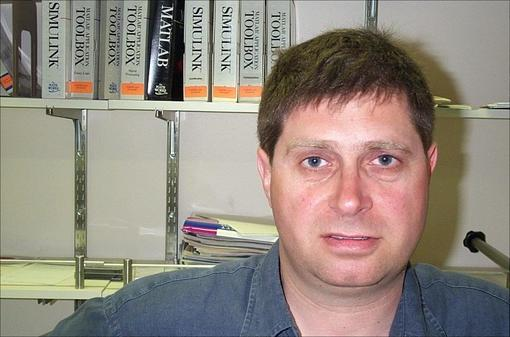

In [15]:
image

In [14]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
inputs = processor(images=image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[ 0.1201,  0.1493,  0.1201,  ...,  0.3683,  0.3829,  0.3975],
          [ 0.3829,  0.4559,  0.4267,  ...,  0.7041,  0.7187,  0.7333],
          [ 0.3537,  0.3391,  0.3537,  ...,  0.6895,  0.7041,  0.6895],
          ...,
          [-0.9164, -0.9164, -0.9602,  ..., -0.8726, -0.9018, -0.9456],
          [-0.9602, -0.9602, -0.9018,  ..., -0.8288, -0.9018, -0.9456],
          [-1.1207, -1.0623, -1.0331,  ..., -0.9164, -1.0477, -1.0623]],

         [[ 0.2890,  0.3190,  0.2890,  ...,  0.4390,  0.4540,  0.4691],
          [ 0.5591,  0.6341,  0.6041,  ...,  0.7842,  0.7992,  0.8142],
          [ 0.5291,  0.5141,  0.5291,  ...,  0.7692,  0.7842,  0.7692],
          ...,
          [-0.6415, -0.6415, -0.6865,  ..., -0.6415, -0.6565, -0.6865],
          [-0.6865, -0.6865, -0.6265,  ..., -0.5965, -0.6415, -0.7016],
          [-0.8666, -0.8066, -0.8066,  ..., -0.6865, -0.8066, -0.8516]],

         [[ 0.3684,  0.3968,  0.3684,  ...,  0.6101,  0.6244,  0.6386],
          [ 0

In [19]:
image_transform = lambda img: processor(images = img, return_tensors="pt").pixel_values.squeeze(0)
transformed_image = image_transform(image)
transformed_image.shape

torch.Size([3, 224, 224])

In [ ]:
outputs = model(**inputs)


In [7]:
for name, param in model.named_parameters():
    print(name, param.shape)


vision_model.embeddings.class_embedding torch.Size([768])
vision_model.embeddings.patch_embedding.weight torch.Size([768, 3, 32, 32])
vision_model.embeddings.position_embedding.weight torch.Size([50, 768])
vision_model.pre_layrnorm.weight torch.Size([768])
vision_model.pre_layrnorm.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.k_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.k_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.v_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.v_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.q_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.q_proj.bias torch.Size([768])
vision_model.encoder.layers.0.self_attn.out_proj.weight torch.Size([768, 768])
vision_model.encoder.layers.0.self_attn.out_proj.bias torch.Size([768])
vision_model.encoder.layers.0.layer_norm1.weight torch.Size([768])
vision_model.encoder.layers.0.layer

In [9]:
from PIL import Image
import requests
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [10]:
inputs = processor(images=image, return_tensors="pt")

In [29]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [26]:
type(inputs)

transformers.tokenization_utils_base.BatchEncoding

In [30]:
outputs = model(inputs['pixel_values'])

In [31]:
type(outputs)

transformers.modeling_outputs.BaseModelOutputWithPooling

In [32]:
type(outputs.last_hidden_state)

torch.Tensor

In [33]:
outputs.last_hidden_state.shape

torch.Size([1, 50, 768])

In [35]:
outputs.pooler_output.shape

torch.Size([1, 768])

In [37]:
classifier = CLIPForImageClassification.from_pretrained("openai/clip-vit-base-patch32")


Some weights of CLIPForImageClassification were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
classifier = CLIPForImageClassification.from_pretrained("openai/clip-vit-base-patch32", num_labels=2)

Some weights of CLIPForImageClassification were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
classifier.config

CLIPConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "CLIPModel"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "clip",
  "projection_dim": 512,
  "text_config": {
    "attention_dropout": 0.0,
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "hidden_act": "quick_gelu",
    "hidden_size": 512,
    "initializer_factor": 1.0,
    "initializer_range": 0.02,
    "intermediate_size": 2048,
    "layer_norm_eps": 1e-05,
    "max_position_embeddings": 77,
    "model_type": "clip_text_model",
    "num_attention_heads": 8,
    "num_hidden_layers": 12,
    "projection_dim": 512,
    "torch_dtype": "float32",
    "vocab_size": 49408
  },
  "torch_dtype": "float32",
  "transformers_version": "4.50.0",
  "vision_config": {
    "attention_dropout": 0.0,
    "dropout": 0.0,
    "hidden_act": "quick_gelu",
    "hidden_size": 768,
    "image_size": 224,
    "initializer_factor": 1.0,
    "initializer_range": 0.02,
    "

In [41]:
with torch.no_grad(): 
    logits = classifier(**inputs).logits

In [42]:
logits

tensor([[-0.3076, -0.3316]])

In [43]:
classifier.parameters()

<generator object Module.parameters at 0x7fe3c4227300>

In [ ]:
import lightning as L

